### Congratulations! You have been hired as a consutant to assit a Hedge Fund manager in optimizing a portfolio containing General Electric(T), AT&T(T), Sony(SNE), Nvidia(NVDA), TESLA(TSLA). Your goal is to find the proper weights that will generate a "good" return for the portfolio. What to take into consideration is that the manager does not like to take much risk but would consider is the returns for this portfilio would be significant. 

### Use your knowledge to look into allocating the weights for the portfolio that would suit his/her interest

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [3]:
from pandas_datareader import data as web

## Data Import
- We will bring in Adj Close from 2011 to current for each security

In [15]:
tickers = ["GE", "T", "NVDA", "SNE","TSLA"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start = "2011-1-1")["Adj Close"]

## Initial Observation
- All securties in the portfolio are close in value early 2011
- We can see tesle takes a significant jump on the pack around mid 2013
- Nvidia take a jump mid 2016 evens up with Tesla late 2018
- All securities were impacted currently by the Covid -19 pandemic in 2020.

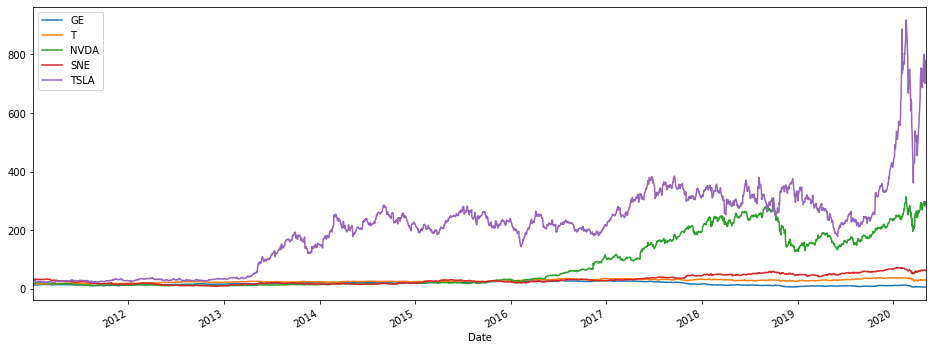

In [18]:
data.plot(figsize = (16,6))

### Normal Daily Returns Calculations
- For a large portion of 2018 and most of 2019 Nvidia would have given you a higher return than Tesla
- Ranging from approximately 10 to 20% of your initial investment

In [21]:
for t in tickers:
    data[f"{t} Normal Returns"] = data[f"{t}"]/data[f"{t}"].iloc[0]

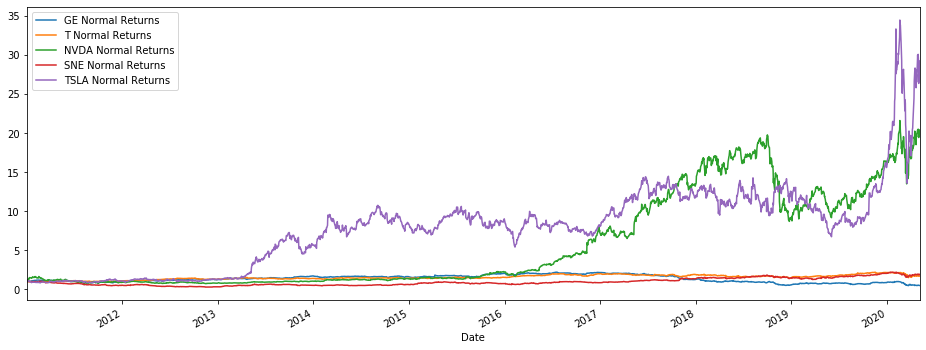

In [26]:
data[["GE Normal Returns","T Normal Returns","NVDA Normal Returns"
      ,"SNE Normal Returns","TSLA Normal Returns"]].plot(figsize = (16,6))

### Allocations
- For this project we will assuming we are weighing our portfolio with arbritrally
- Later we will optimize the portfolio using random allocaiton as well as scipy mathamatical approach

In [74]:
np.random.seed = 101

In [75]:
weights = np.array(np.random.random(5))
weights = weights/weights.sum()
weights

array([0.34459967, 0.13366966, 0.06360949, 0.07826427, 0.37985691])

### Arbritrary Weights
- below are the random weights we awill attribute to each security
- We will assign these weights to each security

In [81]:
for s,w in zip(tickers,weights):
    data[f"{s} allocation"] = data[f"{s} Normal Returns"] * w
    print(f"The Security {s} has a weight of {w}")

The Security GE has a weight of 0.3445996735503761
The Security T has a weight of 0.1336696563854875
The Security NVDA has a weight of 0.06360949435410901
The Security SNE has a weight of 0.07826426913272556
The Security TSLA has a weight of 0.3798569065773019


### Allocation overview
- Based on our initial allocaiton NVDIA makes up the majority of our portfolio we can see which security makes up the majority of our portfilio

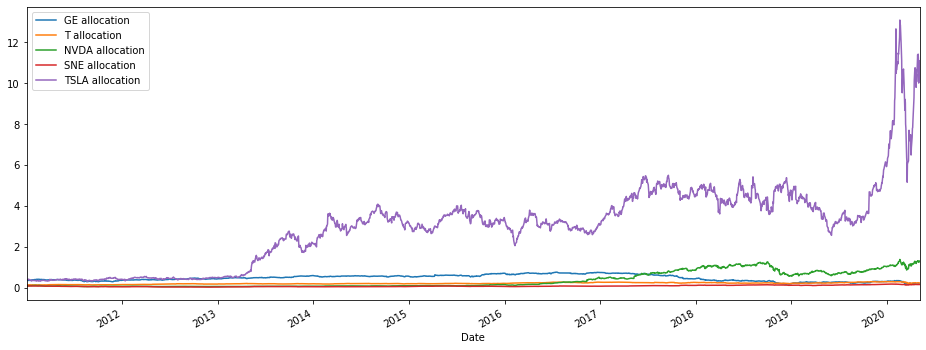

In [82]:
data[["GE allocation","T allocation","NVDA allocation","SNE allocation","TSLA allocation"]].plot(figsize = (16,6))

In [85]:
data.tail(3)

,GE,T,NVDA,SNE,TSLA,GE Normal Returns,T Normal Returns,NVDA Normal Returns,SNE Normal Returns,TSLA Normal Returns,GE allocation,T allocation,NVDA allocation,SNE allocation,TSLA allocation
Date,,,,,,,,,,,,,,,
2020-05-01,6.500,29.900000,282.779999,62.730000,701.320007,0.496529,1.688982,19.421163,1.878792,26.345604,0.171104,0.225766,1.235370,0.147042,10.007560
2020-05-04,6.210,29.600000,291.290009,61.939999,761.190002,0.474377,1.672035,20.005626,1.855131,28.594665,0.163470,0.223500,1.272548,0.145190,10.861881
2020-05-05,6.295,29.886999,296.910004,63.410000,777.700012,0.480870,1.688247,20.391604,1.899158,29.214876,0.165708,0.225667,1.297100,0.148636,11.097472


### Position
- Assuming we invested 100K in this portfolio we will calculate the position for each security in the portfolio
- If we were to invest in this portolio as of 2011-1-03 lets see how much we would have earned over to current data. 2020-5-5
- We will check this by calculating the total position overtime for the potfolio

In [89]:
for t in tickers:
    data[f"{t} position"] = data[f"{t} allocation"] * 100000

In [90]:
data

,GE,T,NVDA,SNE,TSLA,GE Normal Returns,T Normal Returns,NVDA Normal Returns,SNE Normal Returns,TSLA Normal Returns,GE allocation,T allocation,NVDA allocation,SNE allocation,TSLA allocation,GE position,T position,NVDA position,SNE position,TSLA position
Date,,,,,,,,,,,,,,,,,,,,
2011-01-03,13.090866,17.702974,14.560405,33.388481,26.620001,1.000000,1.000000,1.000000,1.000000,1.000000,0.344600,0.133670,0.063609,0.078264,0.379857,34459.967355,13366.965639,6360.949435,7826.426913,3.798569e+04
2011-01-04,13.327191,17.828276,14.514382,33.186565,26.670000,1.018053,1.007078,0.996839,0.993953,1.001878,0.350821,0.134616,0.063408,0.077791,0.380570,35082.062244,13461.576802,6340.843795,7779.096854,3.805704e+04
2011-01-05,13.348678,17.887941,15.628045,33.232452,26.830000,1.019694,1.010448,1.073325,0.995327,1.007889,0.351386,0.135066,0.068274,0.077899,0.382854,35138.622030,13506.628502,6827.365452,7789.852995,3.828535e+04
2011-01-06,13.291386,17.645803,17.790932,33.048901,27.879999,1.015318,0.996771,1.221871,0.989829,1.047333,0.349878,0.133238,0.077723,0.077468,0.397837,34987.808485,13323.797693,7772.257619,7746.827538,3.978366e+04
2011-01-07,13.198287,17.464201,18.287937,33.076435,28.240000,1.008206,0.986512,1.256005,0.990654,1.060856,0.347427,0.131867,0.079894,0.077533,0.402974,34742.738672,13186.675307,7989.382531,7753.281759,4.029737e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29,6.580000,31.430000,298.459991,64.580002,800.510010,0.502641,1.775408,20.498056,1.934200,30.071750,0.173210,0.237318,1.303871,0.151379,11.422962,17320.976399,23731.816277,130387.097278,15137.875313,1.142296e+06
2020-04-30,6.800000,30.469999,292.279999,64.250000,781.880005,0.519446,1.721180,20.073618,1.924316,29.371900,0.179001,0.230069,1.276873,0.150605,11.157119,17900.097900,23006.949368,127687.267052,15060.521234,1.115712e+06
2020-05-01,6.500000,29.900000,282.779999,62.730000,701.320007,0.496529,1.688982,19.421163,1.878792,26.345604,0.171104,0.225766,1.235370,0.147042,10.007560,17110.387219,22576.560316,123537.037676,14704.225527,1.000756e+06


### Total Positon Calculation
- With an investment 100: in early 2011 the portfilio would have earned an investor around 1.3M -1.4 to date
- Sure there were dome rocky moments though the years.

In [91]:
data["total position"] = data[["GE position","T position","NVDA position","SNE position","TSLA position"]].sum(axis = 1)

In [95]:
data.tail(2)

,GE,T,NVDA,SNE,TSLA,GE Normal Returns,T Normal Returns,NVDA Normal Returns,SNE Normal Returns,TSLA Normal Returns,...,T allocation,NVDA allocation,SNE allocation,TSLA allocation,GE position,T position,NVDA position,SNE position,TSLA position,total position
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-04,6.210,29.600000,291.290009,61.939999,761.190002,0.474377,1.672035,20.005626,1.855131,28.594665,...,0.223500,1.272548,0.145190,10.861881,16347.000812,22350.040217,127254.773731,14519.045363,1.086188e+06,1.266659e+06
2020-05-05,6.295,29.886999,296.910004,63.410000,777.700012,0.480870,1.688247,20.391604,1.899158,29.214876,...,0.225667,1.297100,0.148636,11.097472,16570.752130,22566.744051,129709.959923,14863.620998,1.109747e+06,1.293458e+06


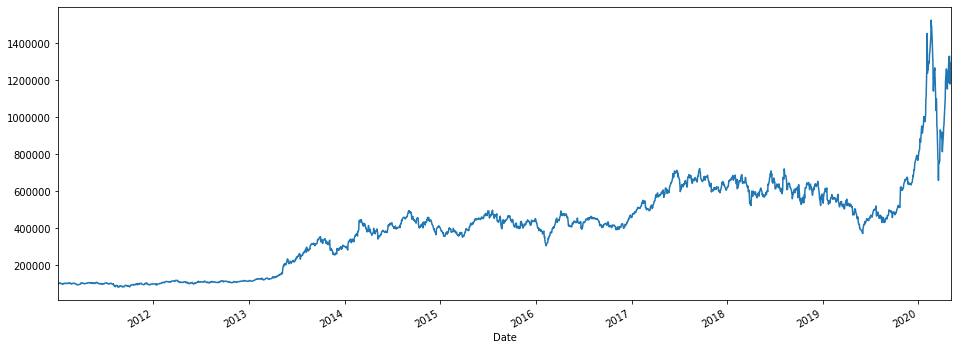

In [94]:
data["total position"].plot(figsize = (16,6))

##  Daily Returns/ Volatility 
- we will use the total returns to calculate the daily returns for the over all portfolio
- the portfolio has a good deal of volatility ranging around -4 - 4% with some outliers aboove and below -8 - 8%

In [96]:
data["daily returns"] = data["total position"].pct_change()

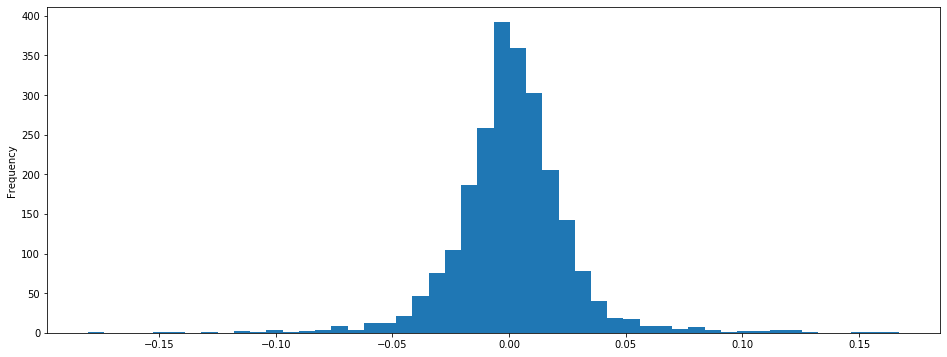

In [113]:
data["daily returns"].plot(kind = "hist", figsize = (16,6), bins = 50)

### Sharp Ratio
- The sharp ratio of a portfolio provides us with a numeric value that will classifiy the portfolio is based on volatility and returns. The Higher the better,meaning the portfolio has a high return with a medium to low risk. - We will calculate the Sharp ratio for this portfolio below

In [114]:
mean_daily_return = data["daily returns"].mean()

In [115]:
mean_daily_return

0.0014033200172272838

In [116]:
volatility = data["daily returns"].std()

In [119]:
sharp = (mean_daily_return/volatility) * np.sqrt(253)

### Sharp Results
- WE are looking for a sharp that is above 1 for a relative satisfaction for out portfilio manager

In [121]:
sharp

0.8915534950091554

### Random Allocation
- Currently we are looking for a sharp thats is generated from arbritrary weights
- We will use python to generate 2000 portfolios that will attempt to privde us the optimal weights and the best sharp for this portfolio.
- we will need the daily returns for each security 

In [126]:
port_daily_returns = data[tickers].pct_change()

In [127]:
n_portfolios = 2000
all_weights = np.zeros((n_portfolios, len(tickers)))
all_returns = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_sharps = np.zeros(n_portfolios)

for index in range(n_portfolios):
    weights = np.array(np.random.random(len(tickers)))
    weights = weights/weights.sum()
    all_weights[index:,] = weights
    
    all_returns[index] = np.sum(port_daily_returns.mean() * weights) * 252
    all_vol[index] = np.sqrt(np.dot(weights.T, np.dot(port_daily_returns.cov() * 252, weights)))
    all_sharps[index] = all_returns[index]/all_vol[index]

### Random Allocation Results
- we will use these results to get the following: 
- Portfolio Max Sharp
- Portfolio with Max return 
- Portfolio with Lowest Volatility

In [128]:
max_sharp = all_sharps.argmax()

In [129]:
max_return = all_returns.argmax()

In [130]:
lowest_vol = all_vol.argmin()

### Plotting random Allocation
- Random Allocaitons tells us that the portfolio could actually have a sharp about our calcualteed .89 above
- we will looks at the associated  weights below
- lowest risked portfolio would produce a 10% return
- best sharp could earn approximately 40% return

Text(0, 0.5, 'Returns')

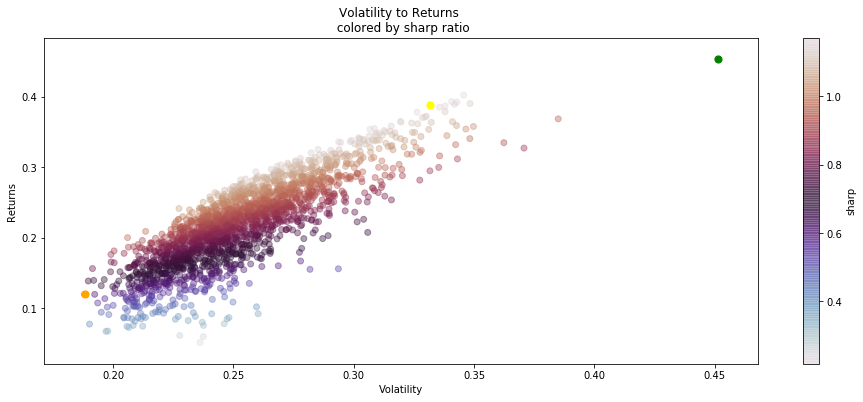

In [147]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns,c = all_sharps, alpha=0.4, cmap="twilight")
plt.colorbar(label = "sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp],c = "yellow", s = 50)
plt.scatter(all_vol[max_return], all_returns[max_return],c = "green", s = 50)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol],c = "orange", s = 50)
plt.title("Volatility to Returns \n colored by sharp ratio")
plt.xlabel("Volatility")
plt.ylabel("Returns")

### Associated Weights
- Below are the associated weights for
- Max Sharp, Max returns, and Lowest Volatility

In [148]:
all_weights[max_sharp]

array([0.00217844, 0.16934771, 0.4028065 , 0.01322876, 0.41243858])

In [149]:
all_weights[max_return]

array([0.05829745, 0.01643609, 0.13430105, 0.00139335, 0.78957207])

In [150]:
all_weights[lowest_vol]

array([0.16006961, 0.64058672, 0.08570769, 0.04155187, 0.0720841 ])

### Optimization with Scipy
- With random allocaitons it would be difficult to generate an accurate sharp for a portfolio containing 100 companies. 
- We will use scipy to use a mathmatical approach
- we will also calcualte the efficient frontier for the portfolio 
- The efficient frontier will genrate the best return at any selected Risk

In [151]:
from scipy.optimize import minimize

## Optimization Functions 
- these functions will assit the minimize function about to generate accurate weights for the portfolio while minimizing risk

In [152]:
def get_sharp(weights):
    weights = np.array(weights)
    ret = np.sum(port_daily_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(port_daily_returns.cov() * 253, weights)))
    shp = ret/vol
    return np.array([ret,vol,shp])

In [153]:
def improve_sharp(weights):
    return get_sharp(weights)[2] * -1

In [155]:
def check_weights(weights):
    return np.sum(weights) - 1

In [156]:
cons = {"type":"eq", "fun":check_weights}

In [157]:
bou = ((0,1),) * len(tickers)
bou

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [160]:
initial_guess = list(np.random.random(len(tickers)))
initial_guess

[0.7821528006389019,
 0.1160171382176921,
 0.6476778822570558,
 0.5862170791307818,
 0.72341757609234]

### Scipy optimization
- INteresting findings
- Scipy is projecting that the portfilio could have a sharp of 1.17
- Respresented weights are indicated by x below

In [161]:
best_results = minimize(improve_sharp,initial_guess, method="SLSQP", constraints=cons, bounds=bou)

In [162]:
best_results

     fun: -1.1799071226948914
     jac: array([ 4.85552475e-01, -5.34355640e-05, -2.62856483e-05,  3.90630066e-02,
        4.46289778e-05])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.75038053e-17, 7.06229336e-02, 5.31555275e-01, 7.10728297e-18,
       3.97821792e-01])

### Scipy Calculation of Returns, volatility, and Sharp
- scipy projects the following
- 42% return, 36% Volatility, 1.18 Sharp
- waht we see in the weights is, to achieve this sharp the portfilio should be made up of roughly 53% Nvidia, and 39% Tesla and pretty much eliminating GE and SNE or very low amounts

In [163]:
get_sharp(best_results.x)

array([0.4255634 , 0.36067534, 1.17990712])

### Efficient Frontier
- We will use Scipy to calculate the Effieicnt frontier

In [187]:
frontier_returns = np.linspace(0.09,0.45,200)

In [188]:
frontier_vol = []

In [189]:
frontier_weights = []

In [190]:
def min_vol(weights):
    return get_sharp(weights)[1]

In [191]:
for potential_return in frontier_returns:
    cons = ({"type":"eq", "fun": check_weights}, 
            {"type":"eq", "fun": lambda x: get_sharp(x)[0] - potential_return})
    best_result = minimize(min_vol,initial_guess,method="SLSQP", constraints=conss, bounds=bou)
    frontier_vol.append(best_result["fun"])
    frontier_weights.append(best_result.x)

In [192]:
best_result

     fun: 0.3816005298275522
     jac: array([0.11710251, 0.05736504, 0.34871592, 0.11440509, 0.42999092])
 message: 'Optimization terminated successfully.'
    nfev: 29
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([4.23315477e-18, 5.70877764e-03, 5.69225498e-01, 0.00000000e+00,
       4.25065724e-01])

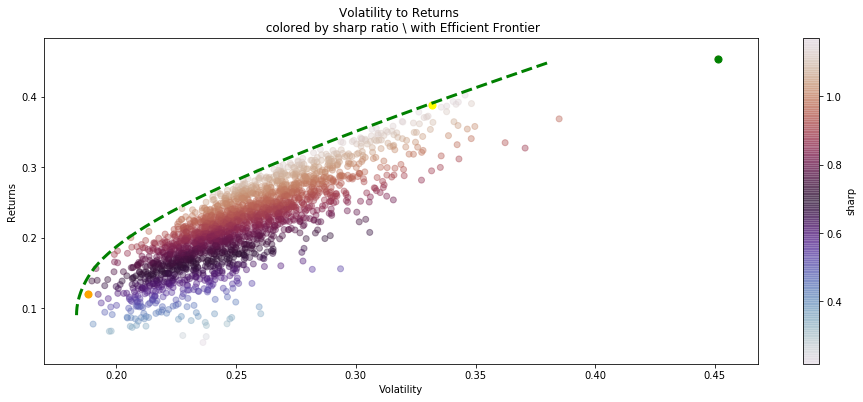

In [203]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns,c = all_sharps, alpha=0.4, cmap="twilight")
plt.colorbar(label = "sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp],c = "yellow", s = 50)
plt.scatter(all_vol[max_return], all_returns[max_return],c = "green", s = 50)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol],c = "orange", s = 50)
plt.title("Volatility to Returns \n colored by sharp ratio \ with Efficient Frontier")
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.plot(frontier_vol,frontier_returns, ls= "--", c = "g", lw = "3");

### Efficient Frontier Associated Weights
- To assist the Fund Manager we will create a Data frame that allow the manager to select a risk he/she is comfortable with a and supply the optimal weights. 

In [206]:
frontier_df = pd.DataFrame(frontier_returns, columns=["frontier returns"])

In [211]:
weights_DF = pd.DataFrame(frontier_weights)

In [219]:
weights_DF.columns = [tickers]

In [220]:
weights_DF

,GE,T,NVDA,SNE,TSLA
0,1.040341e-01,0.734919,0.013865,1.095085e-01,0.037673
1,1.007636e-01,0.734385,0.016264,1.094011e-01,0.039186
2,9.749543e-02,0.733877,0.018653,1.092634e-01,0.040711
3,9.424508e-02,0.733362,0.021014,1.091148e-01,0.042264
4,9.099445e-02,0.732849,0.023374,1.089648e-01,0.043818
...,...,...,...,...,...
195,4.266856e-18,0.025089,0.557338,0.000000e+00,0.417573
196,0.000000e+00,0.020195,0.560537,0.000000e+00,0.419268
197,1.309149e-18,0.015338,0.563563,0.000000e+00,0.421099
198,0.000000e+00,0.010731,0.565431,1.387779e-17,0.423838


In [221]:
frontier_df["Volitility"] = frontier_vol

In [222]:
frontier = pd.concat([frontier_df, weights_DF], axis = 1)

### Finalized Frontier Data

In [223]:
frontier

,frontier returns,Volitility,"(GE,)","(T,)","(NVDA,)","(SNE,)","(TSLA,)"
0,0.090000,0.183332,1.040341e-01,0.734919,0.013865,1.095085e-01,0.037673
1,0.091809,0.183335,1.007636e-01,0.734385,0.016264,1.094011e-01,0.039186
2,0.093618,0.183350,9.749543e-02,0.733877,0.018653,1.092634e-01,0.040711
3,0.095427,0.183375,9.424508e-02,0.733362,0.021014,1.091148e-01,0.042264
4,0.097236,0.183412,9.099445e-02,0.732849,0.023374,1.089648e-01,0.043818
...,...,...,...,...,...,...,...
195,0.442764,0.375362,4.266856e-18,0.025089,0.557338,0.000000e+00,0.417573
196,0.444573,0.376918,0.000000e+00,0.020195,0.560537,0.000000e+00,0.419268
197,0.446382,0.378477,1.309149e-18,0.015338,0.563563,0.000000e+00,0.421099
198,0.448191,0.380038,0.000000e+00,0.010731,0.565431,1.387779e-17,0.423838


### In summary the Portfolio is appears to favor NVDA and TSLA when aiming for a higher return. The assumption can be made the the higher the volatiliy of a single security the the higher return it will bring to a portfolio. 

### Recmmendation to a fund manager is to take in to into consideration that the less risk they will take will distrubute the weights completely than with a higher return. It wll depends on the taste for risk for the investor